In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [2]:
@model HM_BD_F_PNT begin
    @parameter begin
        M_Fr_body = 44.01
        g = 9.8
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "HM_BD_F_PNT")
end

HM_BD_F_PNT (generic function with 1 method)

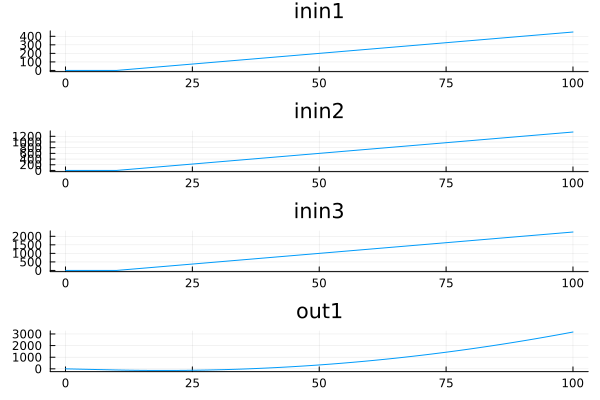

In [4]:
@model Test_HM_BD_F_PNT begin
    @block begin
        p = HM_BD_F_PNT()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
        ramp3 = Ramp(starttime=10, slope=25)
    end
    @connect begin
        ramp1.out => p.in1
        ramp2.out => p.in2
        ramp3.out => p.in3
    end
    @scope begin
        p.in1 => inin1
        p.in2 => inin2
        p.in3 => inin3
        p.out1 => out1
    end
end

m = @compile Test_HM_BD_F_PNT()
res = simulate(m, tspan=[0, 100])
plot(res)

In [5]:
@model HM_HD_F_PNT begin
    @parameter begin
        M_Fr_head = 27.6
        r_Fr_head = 0.21857
        theta_Fr_head = 1.3251
        k_Fr_head = 1210
        d_Fr_head = 8.17
        I_Fr_head = 1.8
        x_k_Fr_head_ini = -0.011885
        g = 9.8
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "HM_HD_F_PNT")
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "4qhezxlA_y2oAY6RtaBU-110", "parent" => "4qhezxlA_y2oAY6RtaBU-105", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "4qhezxlA_y2oAY6RtaBU-25", "parent" => "4qhezxlA_y2oAY6RtaBU-20", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "4qhezxlA_y2oAY6RtaBU-24", "parent" => "4qhezxlA_y2oAY6RtaBU-20", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100

HM_HD_F_PNT (generic function with 1 method)

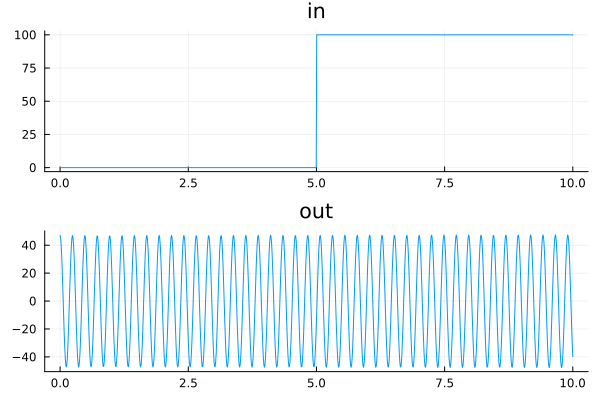

In [6]:
@model TestHM_HD_F_PNT begin
    @block begin
        m = HM_HD_F_PNT()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.in1
    end
    @scope begin
        m.in1 => in
        m.out1 => out
    end
end

m = @compile_derivative TestHM_HD_F_PNT() #１つでも微分ブロックがあるなら@compile_derivativeを書き足す,この場合はmatlabの結果と異なる場合がある
res = simulate(m, tspan=[0, 10])
plot(res)

In [14]:
@model hm_vs_f_pnt begin
    @parameter begin
        kz_Fr_body_organs=82200
        dz_Fr_body_organs=195
        M_Fr_body_organs=12.8
        g=9.8
        z_kz_Fr_body_organs_ini=0.001526
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "HM_VS_F_PNT")
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "-lnRYXmyalo6IyCbHZ23-36", "parent" => "-lnRYXmyalo6IyCbHZ23-31", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "-lnRYXmyalo6IyCbHZ23-35", "parent" => "-lnRYXmyalo6IyCbHZ23-31", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "-lnRYXmyalo6IyCbHZ23-7", "parent" => "-lnRYXmyalo6IyCbHZ23-3", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"

hm_vs_f_pnt (generic function with 1 method)

┌ Warning: Instability detected. Aborting
└ @ SciMLBase /root/.julia/packages/SciMLBase/UhWaH/src/integrator_interface.jl:606


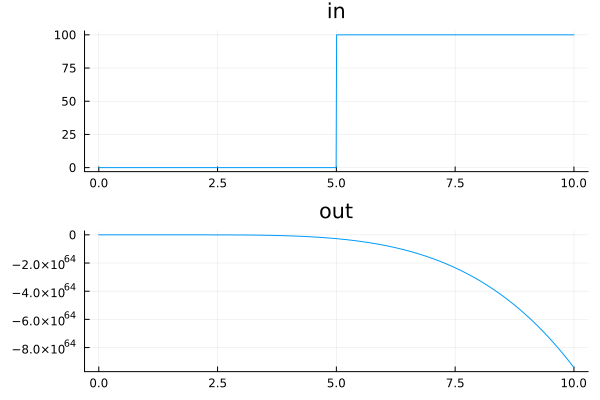

In [15]:
@model TestHm_vs_f_pnt begin
    @block begin
        m = hm_vs_f_pnt()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.in1
    end
    @scope begin
        m.in1 => in
        m.out1 => out
    end
end

m = @compile TestHm_vs_f_pnt() 
res = simulate(m, tspan=[0, 10])
plot(res)

In [ ]:
###HM_F_PNT